In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as mg
import seaborn as sns
from scipy import stats
import warnings
import os


%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
warnings.filterwarnings('ignore')
print(os.listdir("./data"))

['test.csv', 'data_description.txt', 'train.csv', 'sample_submission.csv']


In [2]:
train = pd.read_csv("./data/train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test = pd.read_csv("./data/test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
print("The rows and colums of trainnig set is:", train.shape)
print("The rows and colums of testing set is:", test.shape)
train.info()

The rows and colums of trainnig set is: (1460, 81)
The rows and colums of testing set is: (1459, 80)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
Ro

In [44]:
def missing_info(sets):
    total = sets.isnull().sum().sort_values(ascending = False)
    percentage = total / sets.shape[0]
    missing = pd.DataFrame({"total": total, "percentage":percentage})
    return missing

display(missing_info(train).head(10))
display(missing_info(test).head(10))

,total,percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


,total,percentage
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


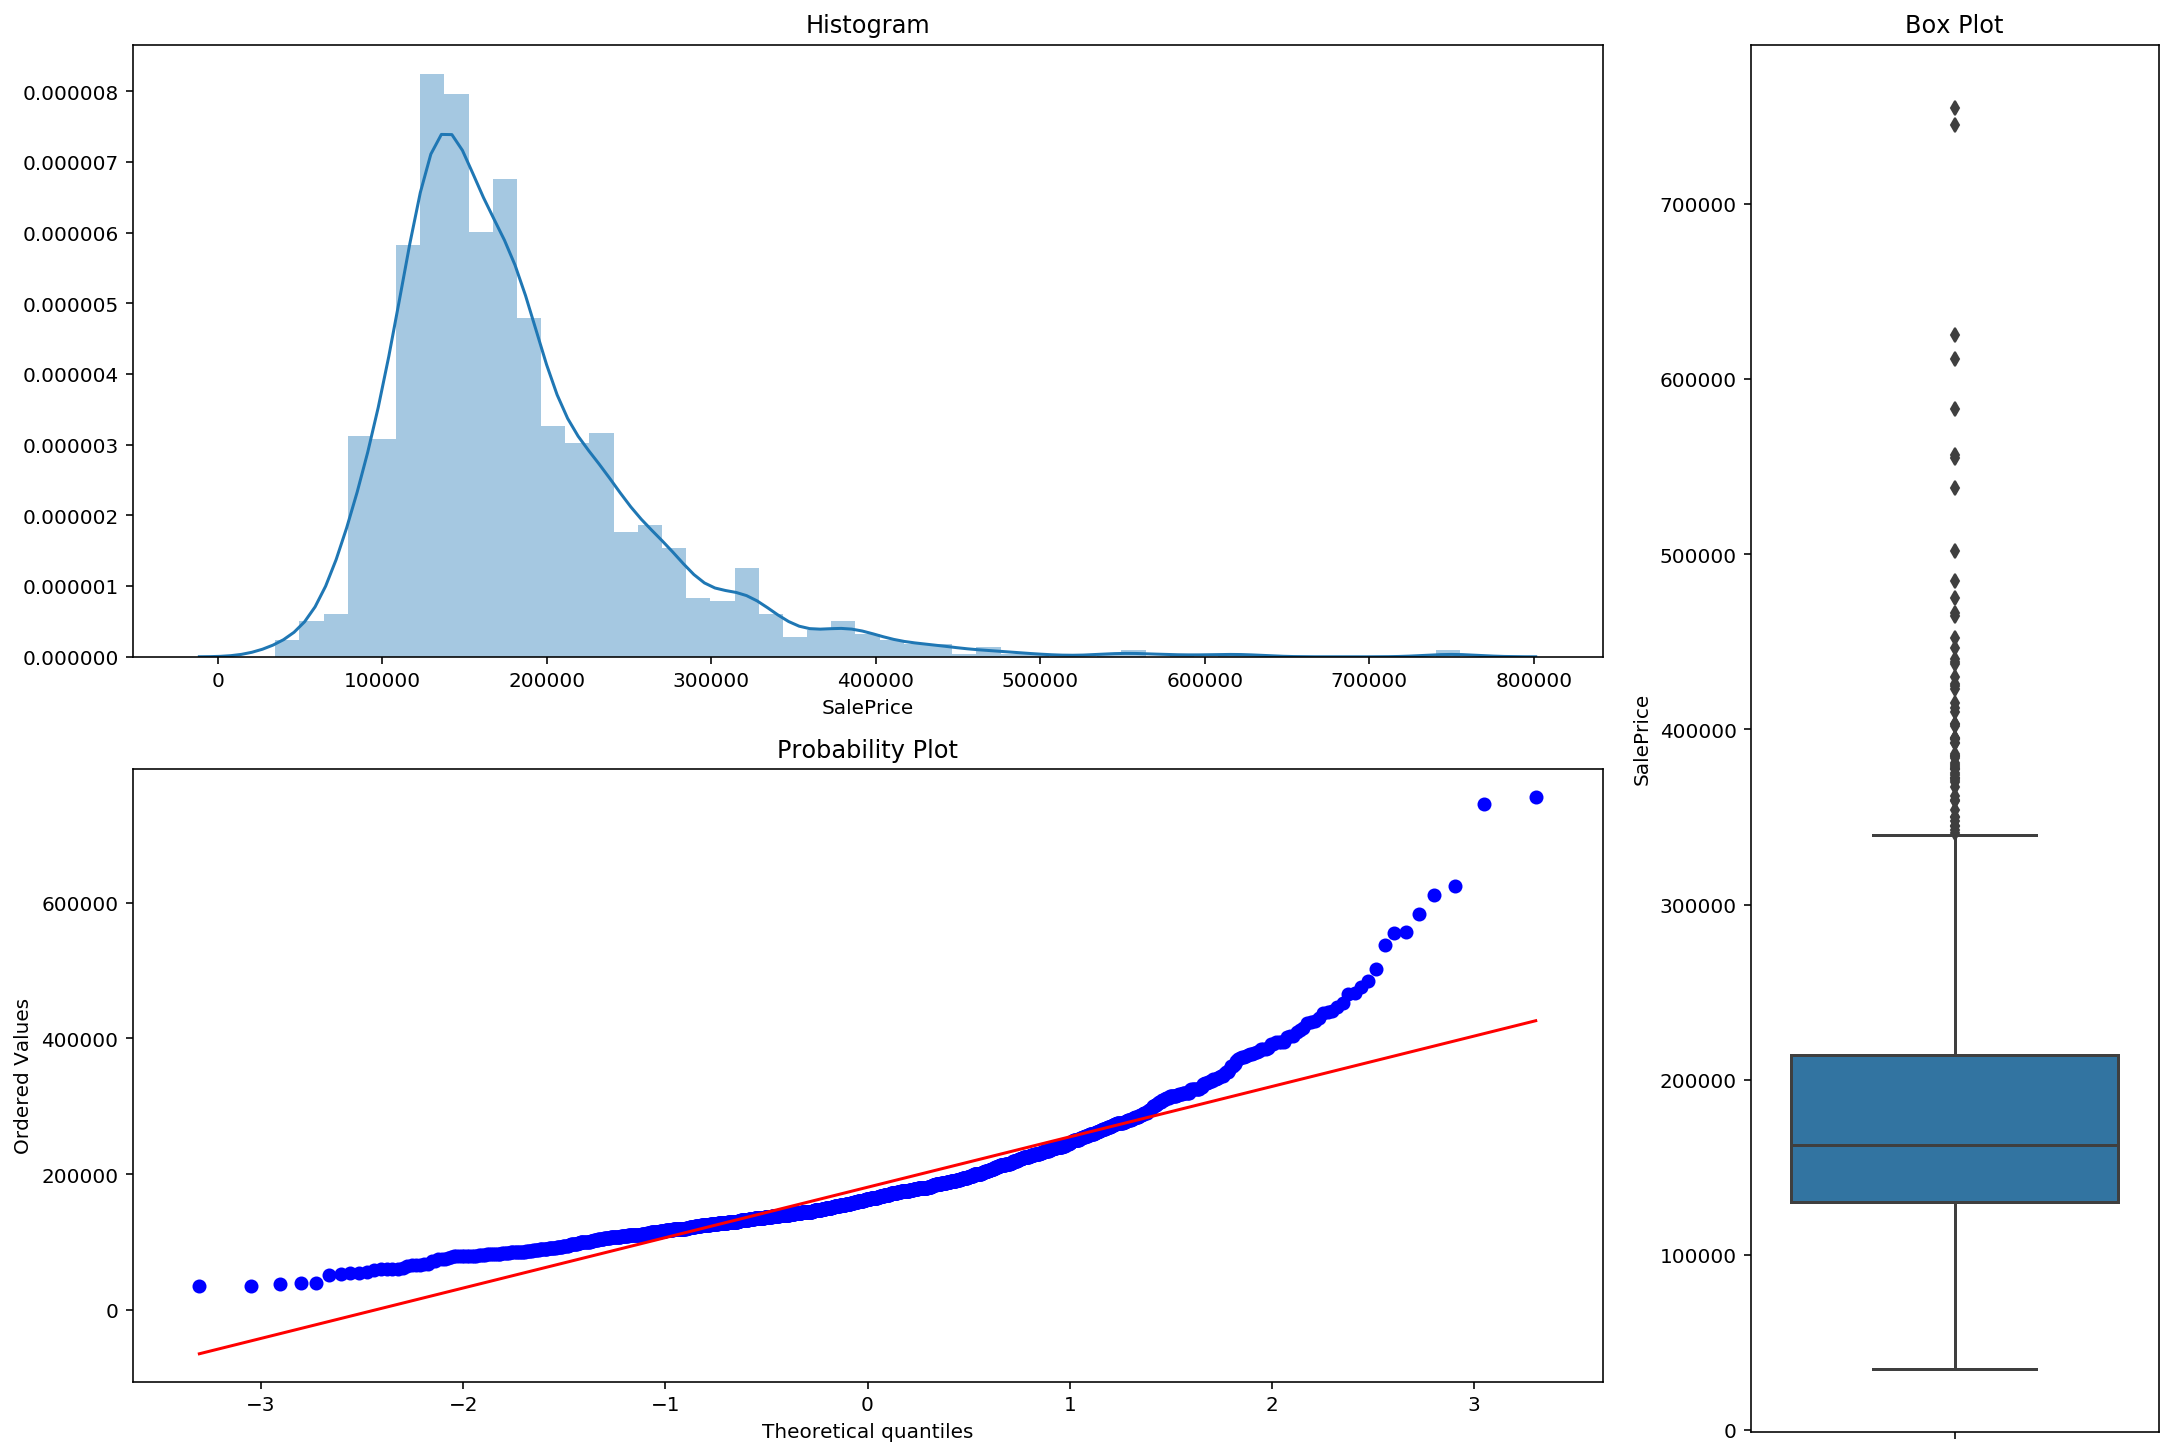

In [51]:
fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = mg.GridSpec(3,3, figure=fig)

ax1 = fig.add_subplot(gs[0, :2])
ax1.set_title("Histogram")
sns.distplot(train.SalePrice, norm_hist=True, ax = ax1)

ax2 = fig.add_subplot(gs[1, :2])
ax2.set_title('QQ_plot')
stats.probplot(train['SalePrice'], plot = ax2)

ax3 = fig.add_subplot(gs[:, 2])
ax3.set_title('Box Plot')
sns.boxplot(train.SalePrice, orient='v', ax = ax3 );

These three charts above can tell us a lot about our target variable.
- Our target variable, SalePrice is not normally distributed.
- Our target variable is right-skewed.
- There are multiple outliers in the variable.

In [53]:
print("Skeweness:" + str(train['SalePrice'].skew()))
print("Kurtosis:" + str(train['SalePrice'].skew()))

Skeweness:1.8828757597682129
Kurtosis:1.8828757597682129


In [57]:
train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

These are the predictor variables sorted in a descending order starting with the most correlated one OverallQual. Let's put this one in a scatter plot and see how it looks.

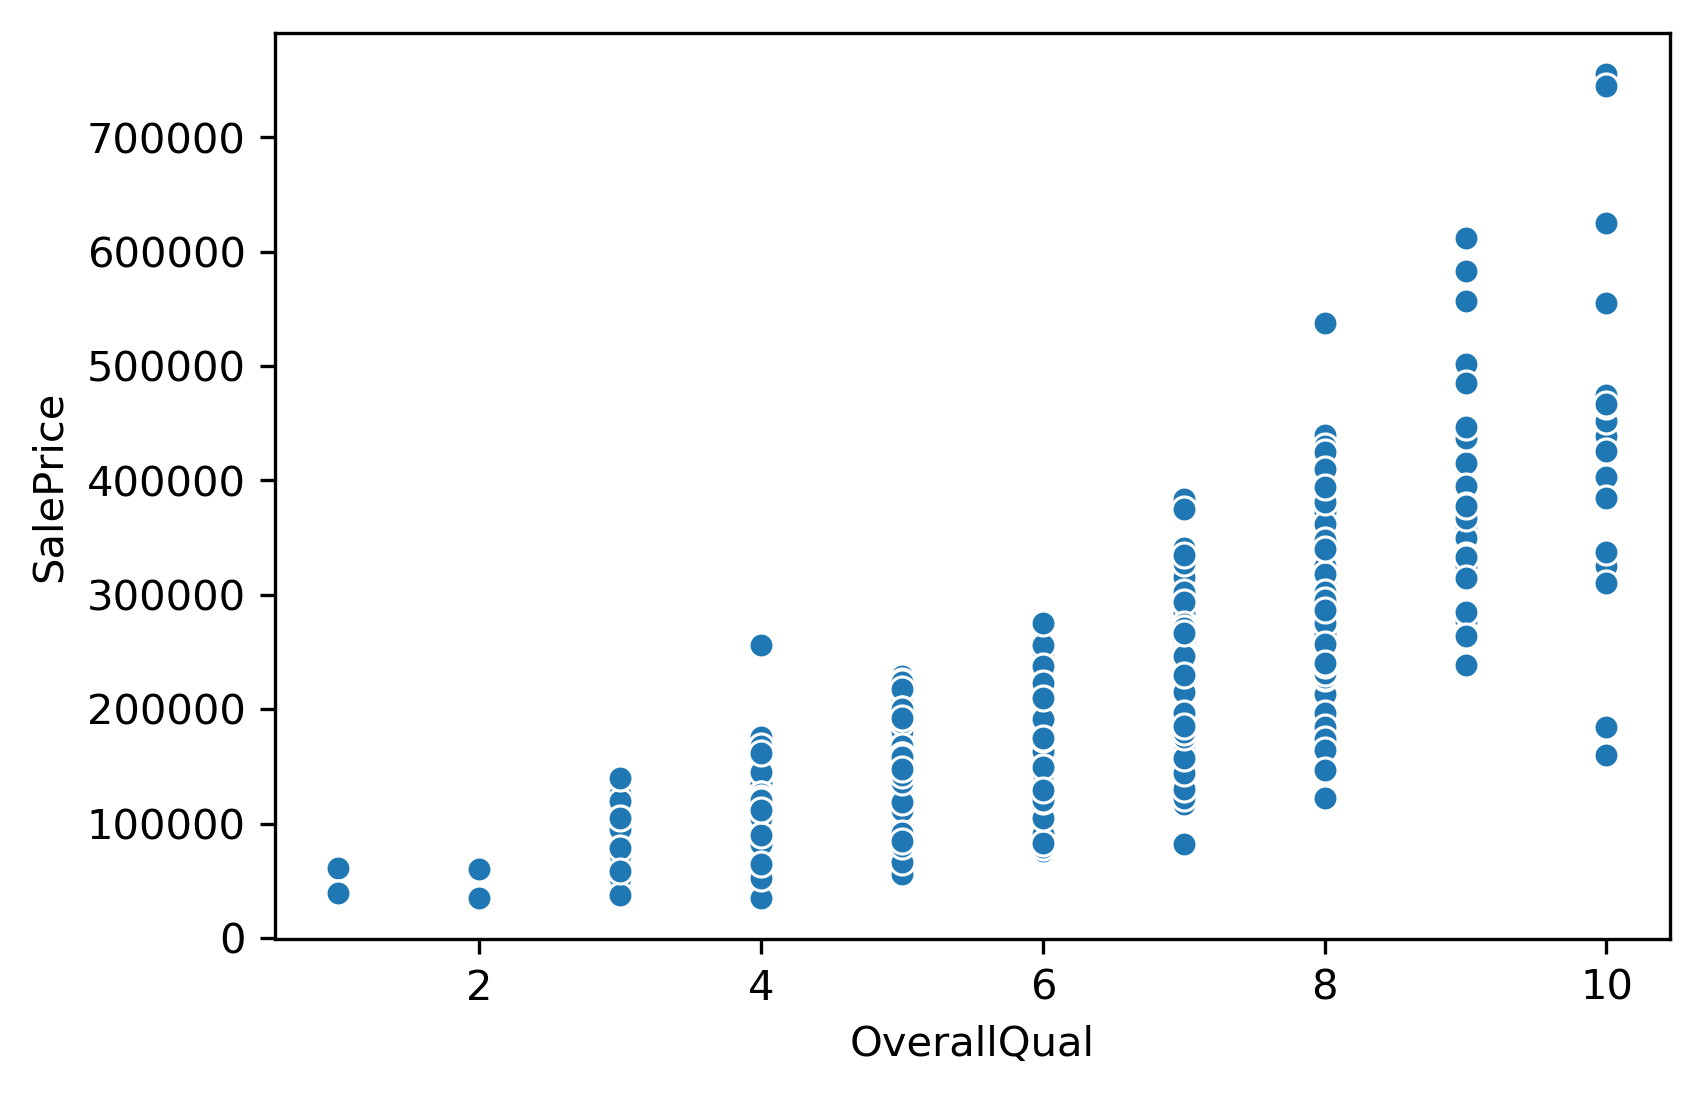

In [63]:
plt.figure(dpi=150)
sns.scatterplot(y=train.SalePrice, x=train.OverallQual)
plt.show()

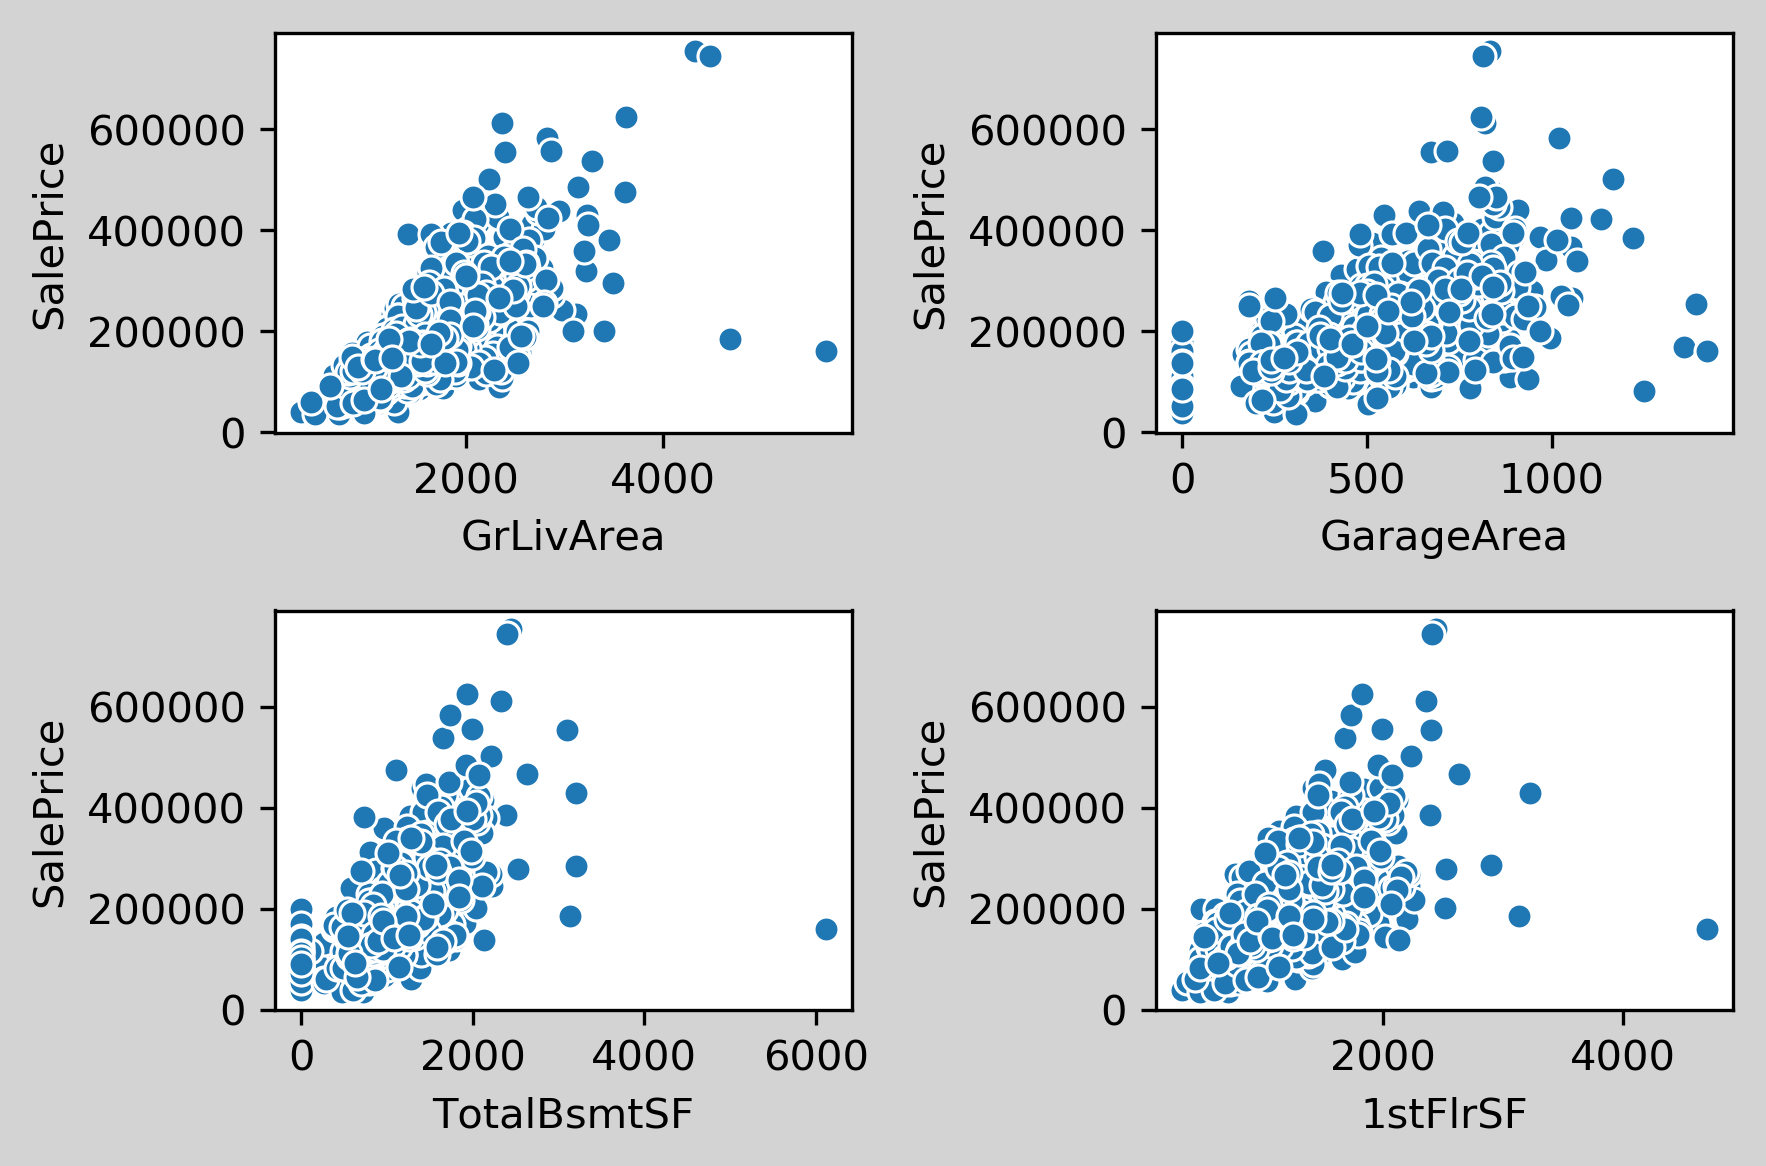

In [68]:
plt.figure("Subplots", facecolor='lightgray', dpi=150)
plt.subplot(221)
sns.scatterplot(y=train.SalePrice, x=train.GrLivArea)
plt.subplot(222)
sns.scatterplot(y=train.SalePrice, x=train.GarageArea)
plt.subplot(223)
sns.scatterplot(y=train.SalePrice, x=train.TotalBsmtSF)
plt.subplot(224)
sns.scatterplot(y=train.SalePrice, x=train['1stFlrSF'])
plt.tight_layout()
plt.show()

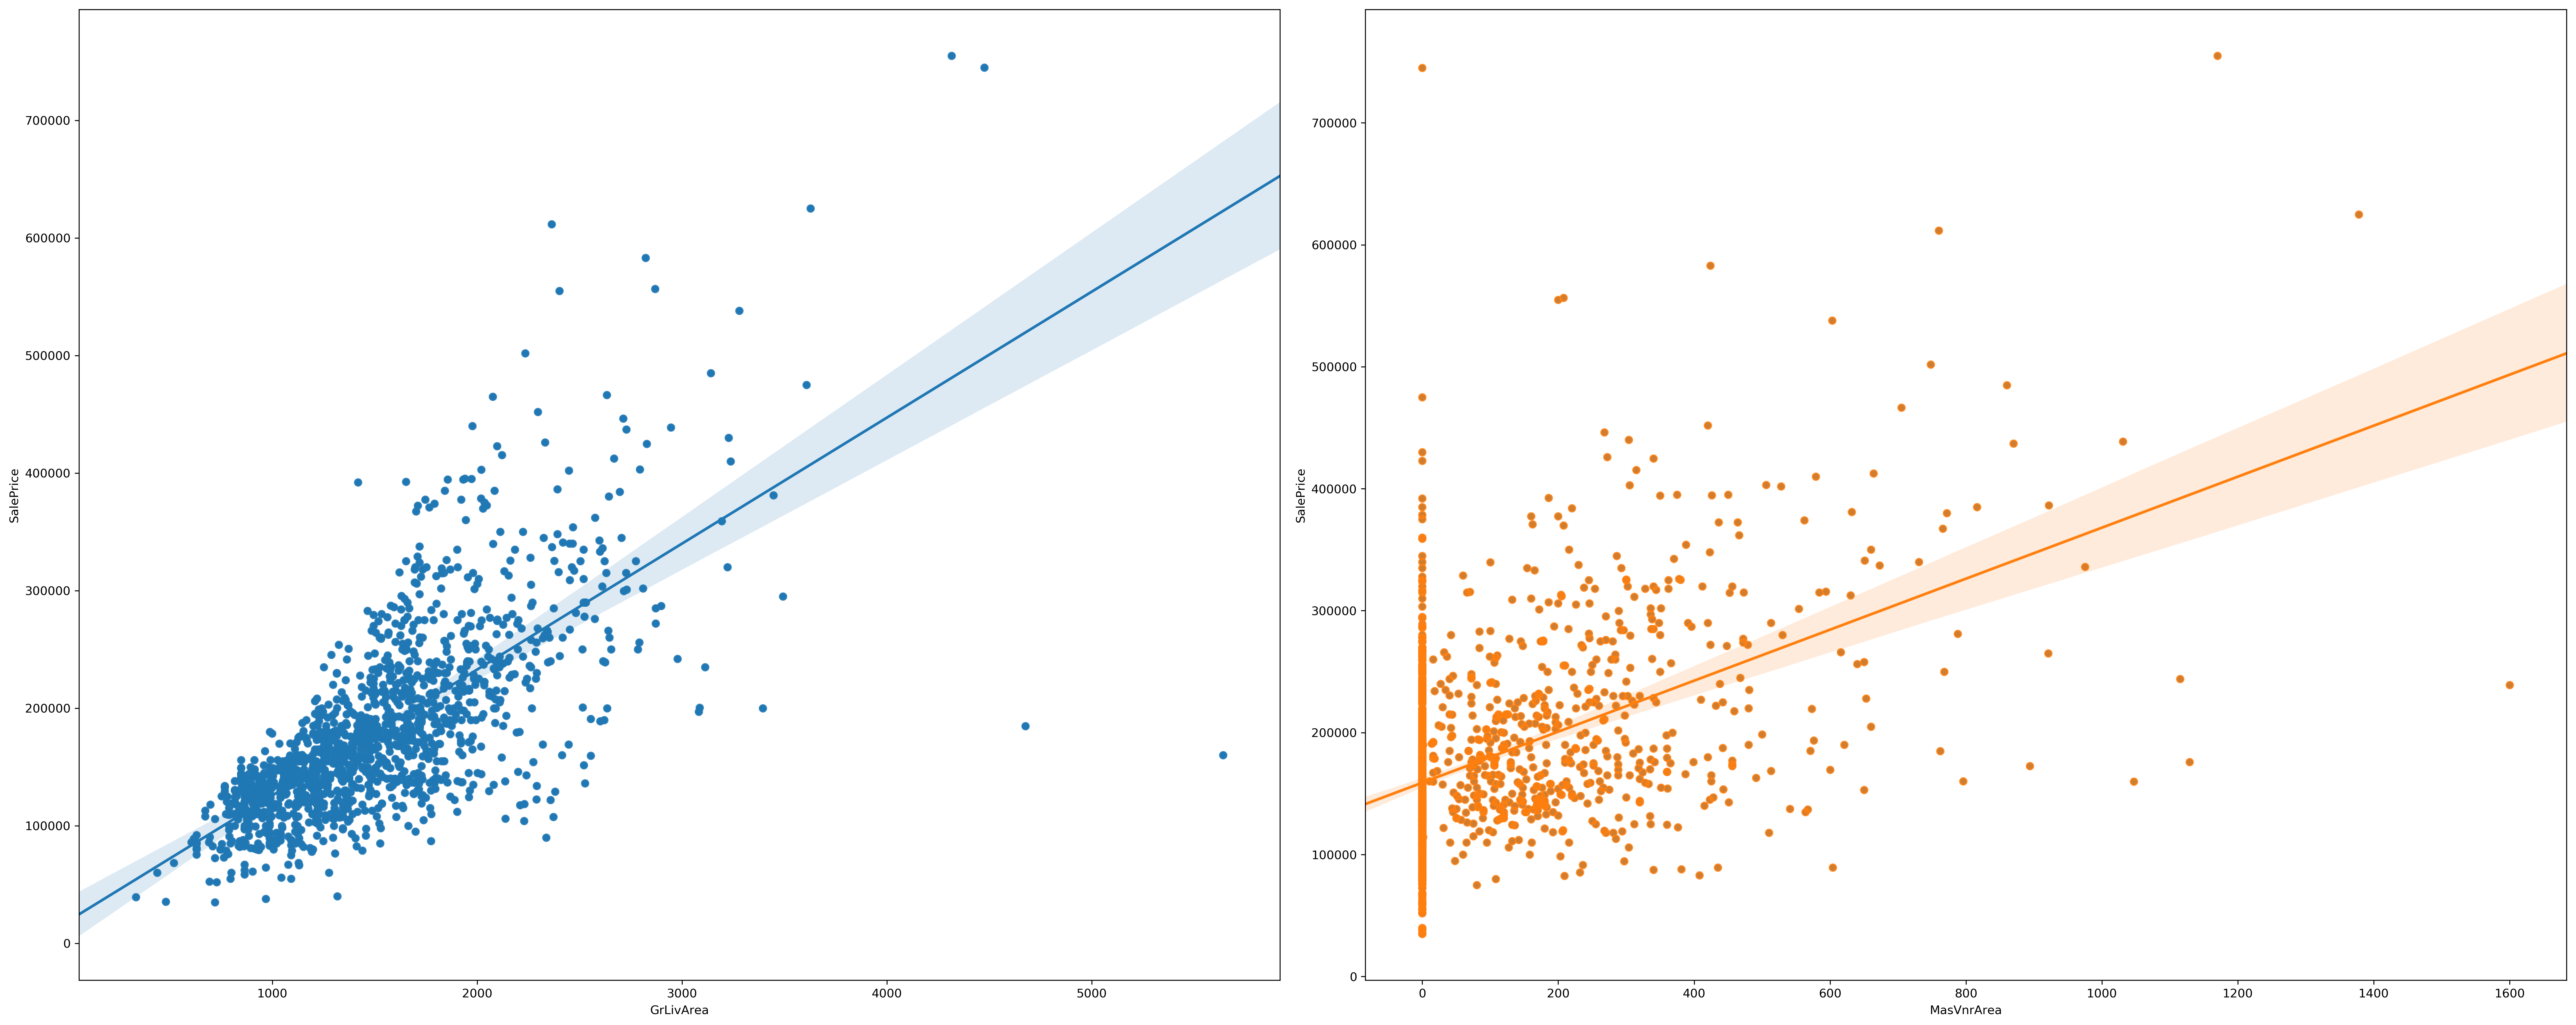

In [77]:
fig, (ax1, ax2) = plt.subplots(figsize=(30,12), ncols=2, dpi=150)

sns.scatterplot( x = train.GrLivArea, y = train.SalePrice,  ax=ax1)
#Putting a regression line. 
sns.regplot(x=train.GrLivArea, y=train.SalePrice, ax=ax1)

sns.scatterplot(x = train.MasVnrArea,y = train.SalePrice, ax=ax2)
sns.regplot(x=train.MasVnrArea, y=train.SalePrice, ax=ax2)

plt.tight_layout()
plt.show()